# Low-Rank Approximation Using the SVD

In the previous section, we saw that the singular value decomposition (SVD) represents any $m\times n$ matrix $\boldsymbol{A}$ as $\boldsymbol{U\Sigma V}^\top$ where $\boldsymbol{U}, \boldsymbol{V}$ are orthogonal matrices containing the left and right singular vectors of $\boldsymbol{A}$, and $\boldsymbol{\Sigma}$ is a "rectangular-diagonal" matrix containing the singular values of $\boldsymbol{A}$. In this section we see an application of the SVD to image compression.

## Approximating matrices with the SVD

While the singular value decomposition appears frequently in statistics and machine learning, one of the most important uses of the SVD is in _low-rank approximation_.

Before explaining the problem of low-rank approximation, let's first state a few useful facts. Let's assume that $\boldsymbol{A}$ is an $m\times n$ matrix with rank $r$ (i.e. $r$ non-zero singular values) and that $\boldsymbol{A} = \boldsymbol{U\Sigma V}^\top$ is its singular value decomposition. Also, let's label $\sigma_1,\dots, \sigma_r$ as its (non-zero) singular values, and let $\boldsymbol{u}_1,\dots,\boldsymbol{u}_r$ be the first $r$ columns of $\boldsymbol{U}$ and $\boldsymbol{v}_1,\dots, \boldsymbol{v}_r$ be the first $r$ columns of $\boldsymbol{V}$. Throughout, we will assume that the singular values are ordered, so that $\sigma_1 \geq \sigma_2 \geq \cdots \geq \sigma_r$. Then another way of writing $\boldsymbol{U\Sigma V}^\top$, and hence $\boldsymbol{A}$ is can be written as


$$
\boldsymbol{A} = \boldsymbol{U\Sigma V}^\top = \sum_{i=1}^r \sigma_i \boldsymbol{u}_i\boldsymbol{v}_i^\top.
$$

Note that each of the terms in the sum is a matrix, $\boldsymbol{u}_i\boldsymbol{v}_i$, multiplied by the scalar $\sigma_i$. Note that each of these matrices in the sum is a _rank-1 matrix_, and that the sum is therefore a rank $r$ matrix. In the problem of low-rank approximation, we want to find a matrix $\widehat{\boldsymbol{A}}$ which has rank at most $k \leq r$, and approximates $\boldsymbol{A}$ closely, i.e. $\boldsymbol{A}\approx \widehat{\boldsymbol{A}}$. Formally, the problem can be written as follows:


$$
\begin{aligned}
\min_{\widehat{\boldsymbol{A}}}&\;\;\;\; \|\boldsymbol{A} - \widehat{\boldsymbol{A}}\|_F && (1)\\
\text{subject to}&\;\;\;\; \text{rank}(\widehat{\boldsymbol{A}}) \leq k
\end{aligned}
$$


Low rank matrices are useful for a variety of reasons, but two important reasons are that 1) they can require less memory to store and 2) we can do faster matrix computations with low rank matrices. It turns out that the solution to the low-rank approximation problem (1) can be exactly constructed from the singular value decomposition. The famous [Eckart–Young–Mirsky theorem](https://en.wikipedia.org/wiki/Low-rank_approximation) states that the solution to the problem (1) is explicitly given by the matrix:


$$
\widehat{\boldsymbol{A}}_k = \sum_{i=1}^k \sigma_i \boldsymbol{u}_i\boldsymbol{v}_i^\top.
$$


That is, the _best possible rank $k$ approximation to $\boldsymbol{A}$ is given by the matrix which keeps just the top $k$ singular values of $\boldsymbol{A}$_. Another way to write $\widehat{\boldsymbol{A}}_k$ is as follows: set $\boldsymbol{\Sigma}_k$ to be the $m\times n$ matrix such that


$$
[\boldsymbol{\Sigma}_k]_{ij} = \begin{cases}\sigma_i & \text{if } i=j \text{ and } i\leq k\\ 0 & \text{otherwise}\end{cases}
$$


That is, $\boldsymbol{\Sigma}_k$ is the same as $\boldsymbol{\Sigma}$, except we set the singular values $\sigma_{k+1},\dots,\sigma_r$ to be equal to zero. Then $\widehat{\boldsymbol{A}}_k = \boldsymbol{U\Sigma}_k\boldsymbol{V}^\top$.

When can we expect $\widehat{\boldsymbol{A}}_k$ to be a good approximation to $\boldsymbol{A}$? It turns out that the error $\|\widehat{\boldsymbol{A}}_k - \boldsymbol{A}\|_F$ is exactly given by $\sqrt{\sum_{i=k+1}^r \sigma_i^2}$. Therefore, if the matrix $\boldsymbol{A}$ has many small singular values, then it can be well approximated by $\widehat{\boldsymbol{A}}_k$.

In the next section, we see an example of low rank approximation with compressing an image.

## An example with image compression

In this section, we look at a simple example of low rank approximation with image compression. Let's see an example image.

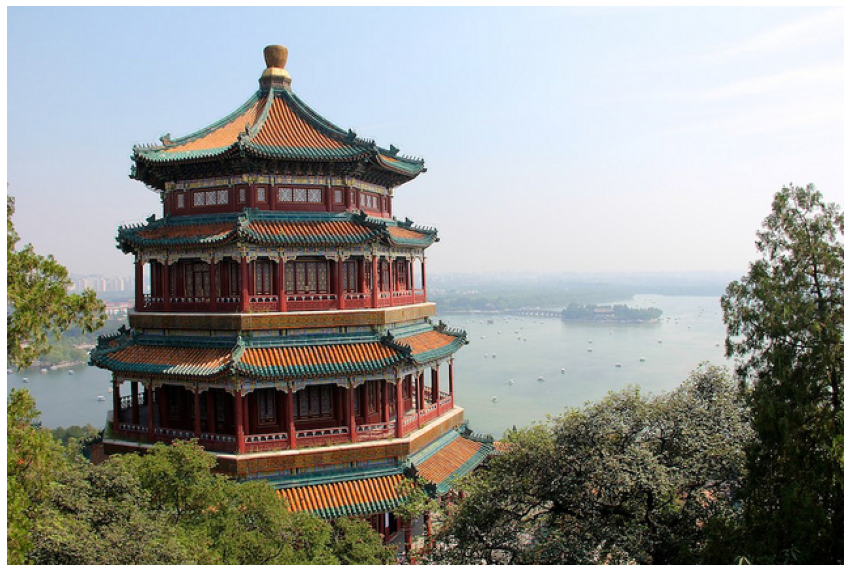

Dimensions: (427, 640, 3)


In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import numpy as np

# load in an example image to use
image = np.load('data/sample_image_1.npy')

# Display image
fig = plt.figure(figsize=(15, 11))
plt.imshow(image, cmap = 'gray')
plt.axis('off')
plt.show()

# Print shape
print('Dimensions:', image.shape)

As we can see, this image is of dimension $(427, 640, 3)$, but let's simplify the problem a bit and make it grayscaled. We can do this by taking the average over the third axis.

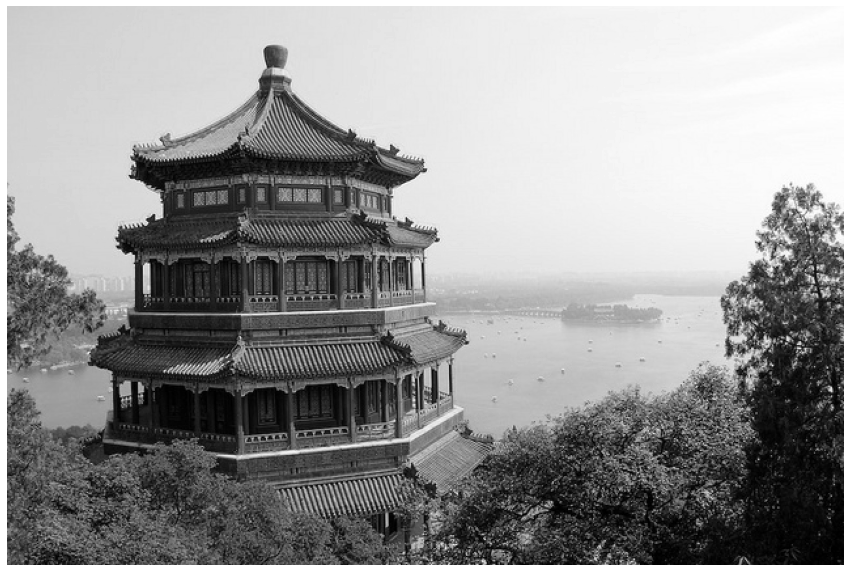

Dimensions: (427, 640)


In [2]:
image = image.mean(axis=2)

# Display image
fig = plt.figure(figsize=(15, 11))
plt.imshow(image, cmap = 'gray')
plt.axis('off')
plt.show()

# Print shape
print('Dimensions:', image.shape)

Now we can think of this image as a $427 \times 640$ matrix $\boldsymbol{A}$.

Let's compute the SVD of the image.

In [3]:
U, s, Vt = np.linalg.svd(image, False)

We can check the rank of $\boldsymbol{A}$ by checking how many non-zero singular values it has.

In [4]:
print('rank(A) = %s' % len(s[s>0]))

rank(A) = 427


So $\boldsymbol{A}$ is a rank $427$ matrix.

In the following we construct the outerproducts of the first eight singular vectors and values, i.e. the first eight terms $\sigma_i \boldsymbol{u}_i\boldsymbol{v}_i^\top$.

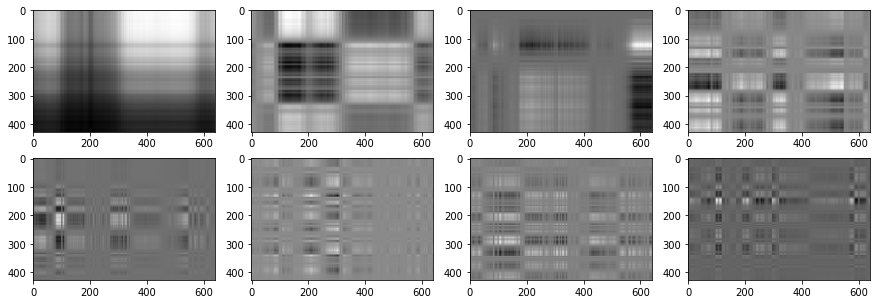

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15,5))
axs = axs.flatten()
for i in range(8):
    axs[i].imshow(np.outer(U[:,i],Vt.T[:,i])*s[i], cmap = 'gray')

These don't appear to look like much, but when we _sum_ them, we can obtain approximations to the original image at various levels of quality.

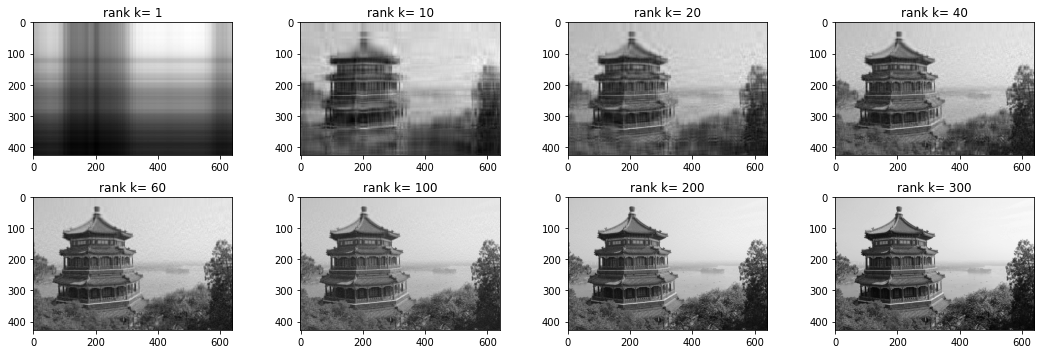

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15,5))
axs = axs.flatten()
idx = 0
for i in [1,10,20,40,60,100,200, 300]:
    outer_products = [np.outer(U[:,j],Vt.T[:,j])*s[j] for j in range(i)]
    reconstruction = np.sum(np.asarray(outer_products), axis=0)
    axs[idx].imshow(reconstruction, cmap = 'gray')
    axs[idx].set_title('rank k= %s' % i)
    idx += 1

fig.tight_layout()

As we can see, as soon as we get to rank $k=40$, we get a fairly good approximation to the original image, and by rank $k=200$ the approximation and the original image are nearly indistinguishable visually.

As we mentioned above, the error from the rank $k$ approximation is given by $\|\widehat{\boldsymbol{A}}_k-\boldsymbol{A}\|_F = \sqrt{\sum_{i=k+1}^{r}\sigma_i^2}$.  Let's plot this error as a function of $k$.

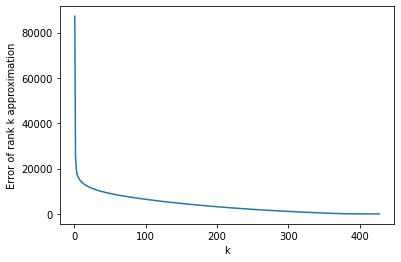

In [7]:
sr = np.flip(s**2)
errors = np.cumsum(sr)
errors = np.flip(errors)
errors = np.sqrt(errors)

plt.plot(range(1,428), errors)
plt.xlabel('k')
plt.ylabel('Error of rank k approximation')
plt.show()

As we can see, the errors start large when $k$ is small, but quickly get smaller as we increase the rank of our approximation.